In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

import numpy as pd
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [ ]:
Univ=pd.read_csv("/content/Universities.csv")

In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [ ]:
def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return x

In [ ]:
df_norm=norm_func(Univ.iloc[:,1:])

In [ ]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,0.743902,0.847222,0.105263,0.368421,0.255144,0.900000,0.000000
1,1.000000,1.000000,0.144737,0.000000,1.000000,0.466667,1.000000
2,0.621951,0.472222,0.592105,0.157895,0.297461,0.166667,0.333333
3,0.743902,0.666667,0.131579,0.315789,0.415629,0.700000,0.000000
4,0.670732,0.763889,0.250000,0.368421,0.239835,0.766667,0.000000
5,0.817073,0.847222,0.118421,0.210526,0.427512,0.933333,0.000000
6,0.756098,0.861111,0.210526,0.315789,0.416996,0.933333,0.000000
7,0.609756,0.638889,0.131579,0.315789,0.208161,0.833333,0.000000
8,0.963415,0.875000,0.000000,0.263158,0.561699,1.000000,0.000000
9,0.731707,0.652778,0.394737,0.052632,0.910991,0.666667,0.000000


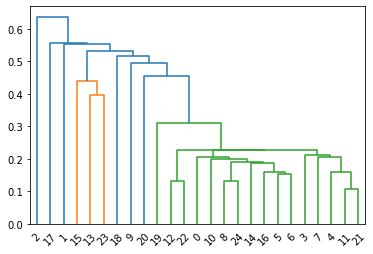

In [ ]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method="single")) #Single linkage method

In [ ]:
hc=AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="single")
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [ ]:
y_hc=hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=["Clusters"])

In [ ]:
y_hc

array([0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0])

In [ ]:
Clusters

,Clusters
0,0
1,3
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
Univ["h_clusterid"]=Clusters

In [ ]:
Univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0
